In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [467]:
df = pd.read_csv('insurance.csv')
print(df.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [468]:
#ELiminamos las variables no numericas
df = df.drop(columns=['sex','region'])
#Reemplazamos los valores de la columna smoker 'yes' por 1 y 'no' por 0
df['smoker'] = df['smoker'].replace({'yes':1,'no':0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   int64  
 4   charges   1338 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 52.4 KB


/tmp/ipykernel_13906/1750981503.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes':1,'no':0})


In [469]:
#Checkeamos si hay valores repetidos
print(df.duplicated().sum())

1


In [470]:
#Como hay (1) valor repetido lo eliminamos
df = df.drop_duplicates()
print(df.duplicated().sum())

0


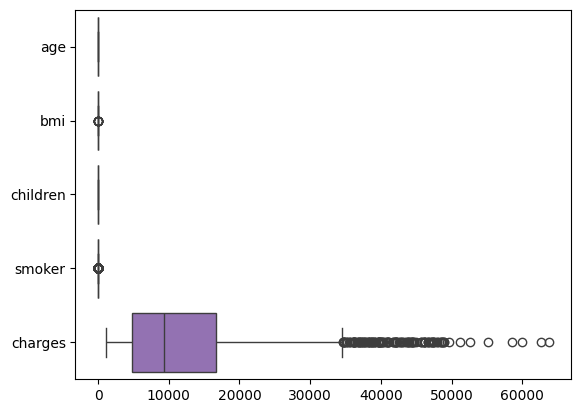

In [471]:
#Vamos a ver si hay outliers
sns.boxplot(data=df, orient='h')
plt.show()


In [472]:
#Eliminamos los outliers

def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_down = df[df[column] < lower_bound].shape[0]
    outliers_up = df[df[column] > upper_bound].shape[0]
    total_outliers = outliers_down + outliers_up

    print(f'Outliers Down para la columna {column}: {outliers_down}')
    print(f'Outliers Up para la columna {column}: {outliers_up}')
    print(f'Total de outliers en la columna {column}: {total_outliers}')

  
    
    return  total_outliers, outliers_down, outliers_up


total_outliers_bmi, outliers_down_bmi, outliers_up_bmi = count_outliers(df, 'bmi')
total_outliers_charges, outliers_down_charges, outliers_up_charges = count_outliers(df, 'charges')


        


def delete_outliers(df, column, up, down,factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    if up !=0:
        df = df[df[column] <= upper_bound]
    elif down !=0:
        df = df[df[column] >= lower_bound]
    return df






df = delete_outliers(df, 'bmi', outliers_up_bmi, outliers_down_bmi, factor=1.34)
cuenta1, cuenta2, cuenta3 = count_outliers(df, 'bmi')
df = delete_outliers(df, 'charges', outliers_up_charges, outliers_down_charges, factor=0.6)
cuenta1, cuenta2, cuenta3 = count_outliers(df, 'charges')


















Outliers Down para la columna bmi: 0
Outliers Up para la columna bmi: 9
Total de outliers en la columna bmi: 9
Outliers Down para la columna charges: 0
Outliers Up para la columna charges: 139
Total de outliers en la columna charges: 139
Outliers Down para la columna bmi: 0
Outliers Up para la columna bmi: 0
Total de outliers en la columna bmi: 0
Outliers Down para la columna charges: 0
Outliers Up para la columna charges: 0
Total de outliers en la columna charges: 0


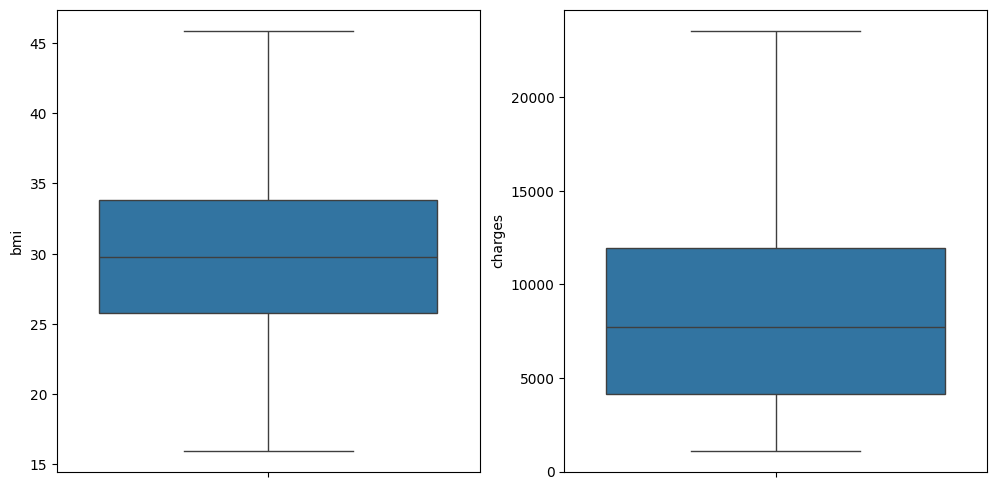

age         1105
bmi         1105
children    1105
smoker      1105
charges     1105
dtype: int64

In [473]:
#Vamos a ver si hay outliers
figs, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(df['bmi'], ax=axs[0])
sns.boxplot(df['charges'], ax=axs[1])
plt.show()
df.count()


In [474]:
# Normalidad la calculamos usando el test de Shapiro-Wilk

from scipy.stats import shapiro
normalidad_age = shapiro(df['age'])
normalidad_bmi = shapiro(df['bmi'])
normalidad_children = shapiro(df['children'])
normalidad_smoker = shapiro(df['smoker'])
normalidad_charges = shapiro(df['charges'])
print(f"Normalidad de age: {normalidad_age}")
print(f"Normalidad de bmi: {normalidad_bmi}")
print(f"Normalidad de children: {normalidad_children}")
print(f"Normalidad de smoker: {normalidad_smoker}")
print(f"Normalidad de charges: {normalidad_charges}")



Normalidad de age: ShapiroResult(statistic=np.float64(0.9459518727050092), pvalue=np.float64(1.1212153150863811e-19))
Normalidad de bmi: ShapiroResult(statistic=np.float64(0.9934047755265093), pvalue=np.float64(8.149653613738792e-05))
Normalidad de children: ShapiroResult(statistic=np.float64(0.8153052647532781), pvalue=np.float64(9.000261411776954e-34))
Normalidad de smoker: ShapiroResult(statistic=np.float64(0.31136774632232533), pvalue=np.float64(2.472656799766499e-53))
Normalidad de charges: ShapiroResult(statistic=np.float64(0.9370505926813828), pvalue=np.float64(3.3050354442000514e-21))


Resultados del Test de Shapiro-Wilk:

    age: p-value ≈ 1.12×10−191.12×10−19 → No es normal.
    bmi: p-value ≈ 8.15×10−58.15×10−5 → No es normal.
    children: p-value ≈ 9.00×10−349.00×10−34 → No es normal.
    smoker: p-value ≈ 2.47×10−532.47×10−53 → No es normal.
    charges: p-value ≈ 3.31×10−213.31×10−21 → No es normal.

Conclusión:

Dado que ninguno de los p-valores es mayor a 0.05, ninguna de las variables sigue una distribución normal por lo que 
